In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

import arrow
import datetime as dt
from sklearn.utils import resample 
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/Users/cicipan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [3]:
comp = pd.read_csv('comp_filter.csv')

In [4]:
comp

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,label
0,/organization/-fame,#fame,http://livfame.com,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Media,NaN,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Application Platforms,Real Time,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,Apps,Games,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web,NaN,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software,NaN,0
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,Games,NaN,0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,Biotechnology,NaN,0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,Analytics,NaN,0
8,/organization/1,One Inc.,http://whatis1.com,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,Mobile,NaN,0
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,E-Commerce,NaN,0


In [6]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66297 entries, 0 to 66296
Data columns (total 16 columns):
permalink            66297 non-null object
name                 66296 non-null object
homepage_url         61259 non-null object
funding_total_usd    66297 non-null object
status               66297 non-null object
country_code         59351 non-null object
state_code           57764 non-null object
region               58281 non-null object
city                 58283 non-null object
funding_rounds       66297 non-null int64
founded_at           51093 non-null object
first_funding_at     66297 non-null object
last_funding_at      66297 non-null object
category_1           63165 non-null object
category_2           33361 non-null object
label                66297 non-null int64
dtypes: int64(2), object(14)
memory usage: 8.1+ MB


In [7]:
# convert '-' to NAN in comp['funding_total_usd']:
comp['funding_total_usd'] = pd.to_numeric(comp['funding_total_usd'], errors='coerce')

In [8]:
# select meaningful features
comp_data = comp[['name','funding_total_usd','country_code','funding_rounds',#'founded_at',
                  'first_funding_at','last_funding_at','category_1','label']]

In [9]:
comp_data.isnull().sum()

name                     1
funding_total_usd    12759
country_code          6946
funding_rounds           0
first_funding_at         0
last_funding_at          0
category_1            3132
label                    0
dtype: int64

In [10]:
# filter out all the nan data
comp_data.dropna(inplace=True)

/Users/cicipan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
comp_data.isnull().sum()

name                 0
funding_total_usd    0
country_code         0
funding_rounds       0
first_funding_at     0
last_funding_at      0
category_1           0
label                0
dtype: int64

In [12]:
comp_data['country_code']

0        IND
1        USA
3        CHN
5        HKG
6        CAN
7        USA
8        USA
9        CHL
13       USA
14       USA
15       USA
16       USA
17       USA
18       GBR
19       USA
20       USA
23       USA
24       USA
25       FRA
26       FRA
27       CHN
28       CHN
29       CHN
30       USA
31       USA
32       USA
34       USA
36       USA
37       AUS
40       USA
        ... 
66259    USA
66260    USA
66261    DNK
66263    USA
66265    USA
66266    FRA
66267    USA
66268    USA
66269    USA
66270    USA
66271    USA
66272    USA
66273    CAN
66277    GBR
66278    ESP
66279    USA
66281    USA
66282    USA
66283    GBR
66284    USA
66285    USA
66286    USA
66287    MYS
66288    USA
66289    USA
66290    AUT
66291    GBR
66292    CHN
66293    HRV
66295    USA
Name: country_code, Length: 48404, dtype: object

In [13]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48404 entries, 0 to 66295
Data columns (total 8 columns):
name                 48404 non-null object
funding_total_usd    48404 non-null float64
country_code         48404 non-null object
funding_rounds       48404 non-null int64
first_funding_at     48404 non-null object
last_funding_at      48404 non-null object
category_1           48404 non-null object
label                48404 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ MB


In [13]:
# comp_data.head(10)
# comp_data is a clean dataset and ready to use!!!

/Users/cicipan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


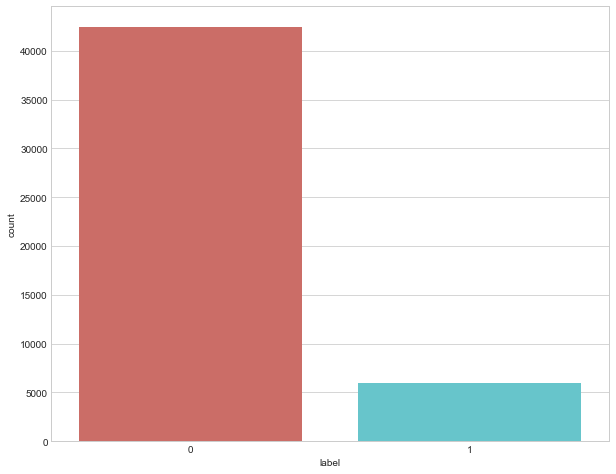

In [14]:
label = sb.countplot(x='label',data=comp_data, palette='hls')
fig_ = label.get_figure()
fig_.savefig('label.png')

# Baseline Model w/ Logistic Regression

## 1.1 Logistic Regression Model w/ only numerical features

In [15]:
# Only select the numerical data as features
logReg_data = comp_data[['funding_total_usd','funding_rounds','label']]

In [16]:
logReg_data.label.value_counts()[1]

5976

In [17]:
# handling with the imbalance data problem
def balance(df):
    
    # Separate majority and minority classes
    df_majority = df[df.label==0]
    df_minority = df[df.label==1]
    
    # n is the number of minority class (label = 1)
    n = df.label.value_counts()[1]

    # # Upsample minority class
    # df_minority_upsampled = resample(df_minority, 
    #                                  replace=True,     # sample with replacement
    #                                  n_samples=47312,    # to match majority class
    #                                  random_state=123) # reproducible results

    # downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,     # sample with replacement
                                     n_samples=n,    # to match majority class
                                     random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    # df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    df_downsampled = pd.concat([df_minority, df_majority_downsampled])
    
    return df_downsampled

In [18]:
logReg_data_balanced = balance(logReg_data)

In [19]:
logReg_data_balanced.label.value_counts()

1    5976
0    5976
Name: label, dtype: int64

In [20]:
X = logReg_data_balanced.iloc[:,:-1]

In [21]:
y = logReg_data_balanced.iloc[:,-1]

In [22]:
# conduct the feature scaling/normalization 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = LogReg.predict(X_test)

In [25]:
sum(y_pred)

788

In [26]:
accuracy_score(y_test, y_pred)

0.59723964868255963

In [27]:
y_train_pred = LogReg.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.6089321200711223

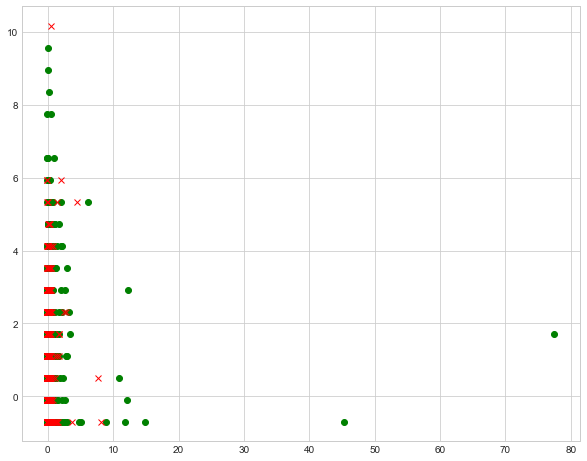

In [28]:
# X_train_ = np.clip(X_train, None, 5)

plt.plot(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1], 'go') 
         #X_train_[np.where(y_train == 0),0], X_train_[np.where(y_train == 0),1], 'rx')
plt.plot(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], 'rx')
plt.savefig('LogReg_numOnly_train.png')
plt.show()


## 1.2 Logistic Regression Model w/ all features

In [29]:
# load LogReg_data to preprocess the encoding and handle with the timestamp features
LogReg_data = comp_data.copy()

In [30]:
LogReg_data.info()
LogReg_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48404 entries, 0 to 66295
Data columns (total 8 columns):
name                 48404 non-null object
funding_total_usd    48404 non-null float64
country_code         48404 non-null object
funding_rounds       48404 non-null int64
first_funding_at     48404 non-null object
last_funding_at      48404 non-null object
category_1           48404 non-null object
label                48404 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ MB


,name,funding_total_usd,country_code,funding_rounds,first_funding_at,last_funding_at,category_1,label
0,#fame,1.000000e+07,IND,1,2015-01-05,2015-01-05,Media,0
1,:Qounter,7.000000e+05,USA,2,2014-03-01,2014-10-14,Application Platforms,0
3,0-6.com,2.000000e+06,CHN,1,2008-03-19,2008-03-19,Curated Web,0
5,01Games Technology,4.125000e+04,HKG,1,2014-07-01,2014-07-01,Games,0
6,Ondine Biomedical Inc.,7.628510e+05,CAN,2,2009-09-11,2009-12-21,Biotechnology,0
7,H2O.ai,3.360000e+07,USA,4,2013-01-03,2015-11-09,Analytics,0
8,One Inc.,1.150050e+06,USA,3,2011-07-20,2014-02-05,Mobile,0
9,"1,2,3 Listo",4.000000e+04,CHL,1,2013-02-18,2013-02-18,E-Commerce,0
13,1-800-DOCTORS,1.750000e+06,USA,1,2011-03-02,2011-03-02,Health and Wellness,0
14,"1-800-PublicRelations, Inc.",6.000000e+06,USA,1,2015-02-01,2015-02-01,Internet Marketing,0


In [31]:
# first balance the dataset
LogReg_data_balanced = balance(LogReg_data)

In [32]:
LogReg_data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11952 entries, 15 to 20949
Data columns (total 8 columns):
name                 11952 non-null object
funding_total_usd    11952 non-null float64
country_code         11952 non-null object
funding_rounds       11952 non-null int64
first_funding_at     11952 non-null object
last_funding_at      11952 non-null object
category_1           11952 non-null object
label                11952 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 840.4+ KB


In [33]:
LogReg_data_balanced.loc[35632]

name                    Miaopai
funding_total_usd       2.5e+08
country_code                CHN
funding_rounds                2
first_funding_at     2014-09-25
last_funding_at      2015-11-24
category_1                 Apps
label                         0
Name: 35632, dtype: object

In [34]:
# # Encode 'category' features, label them with values between 0 and n_classes-1
# df = LogReg_data_balanced
# col = 'category_1'
# le = preprocessing.LabelEncoder()
# col_label = le.fit_transform(list(df[col]))
# df[col + '_encode']= col_label #pd.Series(col_label)

In [35]:
LogReg_data_balanced.loc[35632]

name                    Miaopai
funding_total_usd       2.5e+08
country_code                CHN
funding_rounds                2
first_funding_at     2014-09-25
last_funding_at      2015-11-24
category_1                 Apps
label                         0
Name: 35632, dtype: object

In [36]:
# Encode 'category' features, label them with values between 0 and n_classes-1
def encoder_cat(df, col):
    le = preprocessing.LabelEncoder()
    col_label = le.fit_transform(list(df[col]))
    df[col]=col_label
    return le

In [ ]:
# encode text features
def encoder_text(df, col, min_df=10):
    df[col] = df[col].astype(str)
    vectorizer = CountVectorizer(min_df=min_df)
    vectorizer.fit(df[col])
    col_bag_of_words = vectorizer.transform(df[col])
    return col_bag_of_words

In [37]:
# Only run once !!!
country_list = encoder_cat(LogReg_data_balanced, 'country_code')
category_list = encoder_cat(LogReg_data_balanced, 'category_1')

In [38]:
LogReg_data_balanced

,name,funding_total_usd,country_code,funding_rounds,first_funding_at,last_funding_at,category_1,label
15,1 Mainstream,5.000000e+06,82,1,2015-03-17,2015-03-17,27,1
20,1000 Markets,5.000000e+05,82,1,2009-05-15,2009-05-15,31,1
23,1000memories,2.535000e+06,82,2,2010-01-01,2011-02-16,148,1
31,100Plus,1.250000e+06,82,2,2011-11-02,2011-11-30,19,1
32,1010data,3.500000e+07,82,1,2010-03-08,2010-03-08,478,1
67,13th Lab,7.000000e+05,75,1,2012-06-15,2012-06-15,38,1
80,170 Systems,1.400000e+07,82,1,2002-04-16,2002-04-16,478,1
101,1DocWay,1.700000e+06,82,2,2011-08-10,2015-07-21,185,1
139,21viaNet,3.960000e+08,13,5,2008-02-13,2014-12-04,478,1
140,22nd Century Group,1.503475e+07,82,6,2010-12-28,2014-09-18,56,1


In [39]:
country_list.classes_

array(['ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BGD', 'BGR', 'BMU', 'BRA',
       'BWA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CYP', 'CZE', 'DEU',
       'DNK', 'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR',
       'GHA', 'GRC', 'GTM', 'HKG', 'HRV', 'HUN', 'IDN', 'IND', 'IRL',
       'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KEN', 'KHM', 'KOR', 'LBN',
       'LKA', 'LTU', 'LUX', 'LVA', 'MAF', 'MCO', 'MDA', 'MEX', 'MLT',
       'MNE', 'MYS', 'NGA', 'NIC', 'NLD', 'NOR', 'NZL', 'PAK', 'PAN',
       'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROM', 'RUS', 'SAU', 'SGP',
       'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TUN', 'TUR', 'TWN', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'ZAF', 'ZMB', 'ZWE'], 
      dtype='<U3')

In [40]:
category_list.classes_

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Algorithms', 'All Markets',
       'All Students', 'Alumni', 'Analytics', 'Android', 'Angels',
       'Animal Feed', 'App Marketing', 'App Stores',
       'Application Performance Monitoring', 'Application Platforms',
       'Apps', 'Aquaculture', 'Architecture', 'Archiving', 'Art',
       'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Augmented Reality', 'Auto', 'Automotive', 'B2B', 'BPO Services',
       'Babies', 'Baby Accessories', 'Banking', 'Batteries', 'Beauty',
       'Bicycles', 'Big Data', 'Big Data Analytics', 'Billing',
       'Bio-Pharm', 'Bioinformatics', 'Biomass Power Generation',
       'Biometrics', 'B

In [41]:
# calculate the duration between 'first_funding_at' and 'last_funding_at'
t1 = pd.to_datetime(LogReg_data_balanced.first_funding_at, errors='coerce')
t1 = pd.to_timedelta(t1).dt.days
t2 = pd.to_datetime(LogReg_data_balanced.last_funding_at, errors='coerce')
t2 = pd.to_timedelta(t2).dt.days

In [42]:
LogReg_data_balanced['funding_duration'] = t2 - t1

In [43]:
LogReg_data_balanced.head()

,name,funding_total_usd,country_code,funding_rounds,first_funding_at,last_funding_at,category_1,label,funding_duration
15,1 Mainstream,5000000.0,82,1,2015-03-17,2015-03-17,27,1,0
20,1000 Markets,500000.0,82,1,2009-05-15,2009-05-15,31,1,0
23,1000memories,2535000.0,82,2,2010-01-01,2011-02-16,148,1,411
31,100Plus,1250000.0,82,2,2011-11-02,2011-11-30,19,1,28
32,1010data,35000000.0,82,1,2010-03-08,2010-03-08,478,1,0


In [44]:
X = LogReg_data_balanced[['funding_total_usd','funding_rounds','funding_duration','category_1','country_code']]

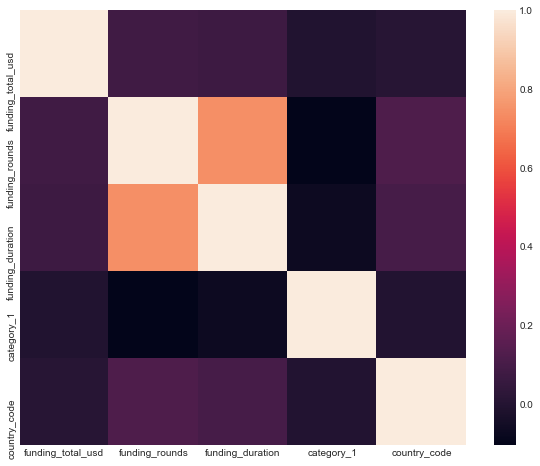

In [45]:
# plot the correlation between the features
corr = sb.heatmap(X.corr())
fig = corr.get_figure()
fig.savefig('corr.png') 

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11952 entries, 15 to 20949
Data columns (total 5 columns):
funding_total_usd    11952 non-null float64
funding_rounds       11952 non-null int64
funding_duration     11952 non-null int64
category_1           11952 non-null int64
country_code         11952 non-null int64
dtypes: float64(1), int64(4)
memory usage: 880.2 KB


In [47]:
y = LogReg_data_balanced.label

In [48]:
X.values

array([[  5.00000000e+06,   1.00000000e+00,   0.00000000e+00,
          2.70000000e+01,   8.20000000e+01],
       [  5.00000000e+05,   1.00000000e+00,   0.00000000e+00,
          3.10000000e+01,   8.20000000e+01],
       [  2.53500000e+06,   2.00000000e+00,   4.11000000e+02,
          1.48000000e+02,   8.20000000e+01],
       ..., 
       [  1.40000000e+05,   1.00000000e+00,   0.00000000e+00,
          4.30000000e+01,   8.20000000e+01],
       [  5.00000000e+05,   2.00000000e+00,   2.68000000e+02,
          4.78000000e+02,   3.40000000e+01],
       [  6.50000000e+07,   3.00000000e+00,   9.01000000e+02,
          2.74000000e+02,   8.20000000e+01]])

In [49]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [-1, -2])
X = onehotencoder.fit_transform(X).toarray()

In [51]:
# split the dataset to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train[:, -3:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
X_train = np.hstack([X_train[:, :-3], scaler.transform(X_train[:, -3:])])
X_test = np.hstack([X_test[:, :-3], scaler.transform(X_test[:, -3:])])

In [59]:
model = sklearn.ensemble.RandomForestClassifier(n_estimators=50) 
#model = LogisticRegression()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.97887250287626815

In [61]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.67461313258051026

In [230]:
comp_data['country_code']

1         20.0
3        117.0
6        117.0
7        117.0
8        117.0
9        117.0
13       117.0
14       117.0
15       117.0
16        37.0
17        37.0
18        20.0
19       117.0
20       117.0
23       117.0
24         4.0
25       117.0
26       117.0
27       117.0
30         4.0
31       117.0
32        95.0
34       117.0
36        82.0
37       117.0
40       117.0
41       117.0
42       117.0
46       117.0
48       117.0
         ...  
66253      NaN
66255      NaN
66256      NaN
66257      NaN
66258      NaN
66259      NaN
66260      NaN
66263      NaN
66266      NaN
66267      NaN
66268      NaN
66269      NaN
66270      NaN
66271      NaN
66272      NaN
66273      NaN
66277      NaN
66278      NaN
66279      NaN
66281      NaN
66282      NaN
66283      NaN
66284      NaN
66285      NaN
66286      NaN
66287      NaN
66290      NaN
66291      NaN
66293      NaN
66295      NaN
Name: country_code, Length: 39018, dtype: float64